# Stroke prediction dataset analysis using logistic regression

# Анализ риска возникновения приступа с помощью логистической регрессии

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей.
Этот датасет используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения. Каждая строка в датасете содержит соответствующую информацию о пациенте.

Параметры:
1) id: уникальный идентификатор
2) gender: "Мужской", "Женский" или "Другой"
3) age: возраст пациента
4) hypertension: 0, если у пациента нет гипертонии, 1, если у пациента гипертония
5) heart_disease: 0, если у пациента нет заболеваний сердца, 1, если у пациента есть заболевание сердца
6) ever_married: "Нет" или "Да"
7) work_type: "детский", "государственный", "никогда не работавший", "частный" или "самозанятый"
8) Residence_type: "Сельская" или "Городская"
9) avg_glucose_level: средний уровень глюкозы в крови
10) bmi: индекс массы тела
11) smoke_status: "ранее курил", "никогда не курил", "курит" или "неизвестно"*
12) stroke: 1, если у пациента был инсульт или 0, если нет 

I will use this dataset to practice predicting outcome in case of inbalanced dataset using Weighted Logistic Regression and SMOTE. I will also use summary of the final model to draw odds ratios.

Я использую этот набор данных в целях практики прогнозирования результатов на основе несбалансированного набора данных с использованием Weighted Logistic Regression и SMOTE. Также на основании сводной таблицы финальной модели я посчитаю соотношения шансов для разных групп пациентов.

#### Import modules and dataset

#### Загружаем необходимые модули и датасет

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as ex
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
import inflection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [8]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [9]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

### EDA

In [10]:
data.isna().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='age'>

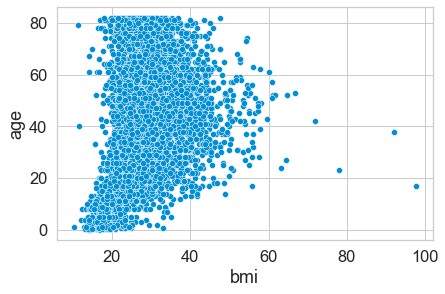

In [11]:
sns.scatterplot(data=data, x='bmi', y='age')

There are a few outliers, which would affect the mean, so I'm going to replace zeros in 'bmi' column with median.

На графике видно несколько достаточно датапоинтов с высоким показателем bmi, что повлияет на среднее значение. Поэтому для замены нулей в колонне 'bmi' я использую медиану.

In [12]:
data = data.fillna(data.median())

In [13]:
data.isna().sum().sort_values(ascending=False)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Next, one column name needs changing.

Также необходимо заменить одно из имен колонок в датасете.

In [14]:
data.rename(columns={'Residence_type':'residence_type'}, inplace=True)

In [15]:
data.duplicated().sum()

0

There is no duplicated data, so I'm going to drop 'id' attribute.

Повторяющихся строк в датасете нет, так что колонку 'id' можно удалить.

In [16]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [18]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

data[column_numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


Now, let's see how target and categorical values are distributed.

Посмотрим, как распределены целевое и категорические значения.

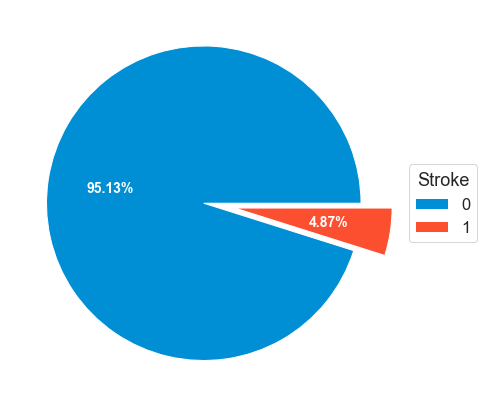

In [19]:
pie_data = data['stroke'].value_counts(normalize=True).values * 100
pie_label = data['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Stroke',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Target values are unevenly distributed, so later in the project I'm going to use SMOTE to upsample the data.

Целевые значения распределены не равномерно, так что позже по мере проекта я использую SMOTE, чтобы увеличить количество дата поинтов и уравнять распределение.

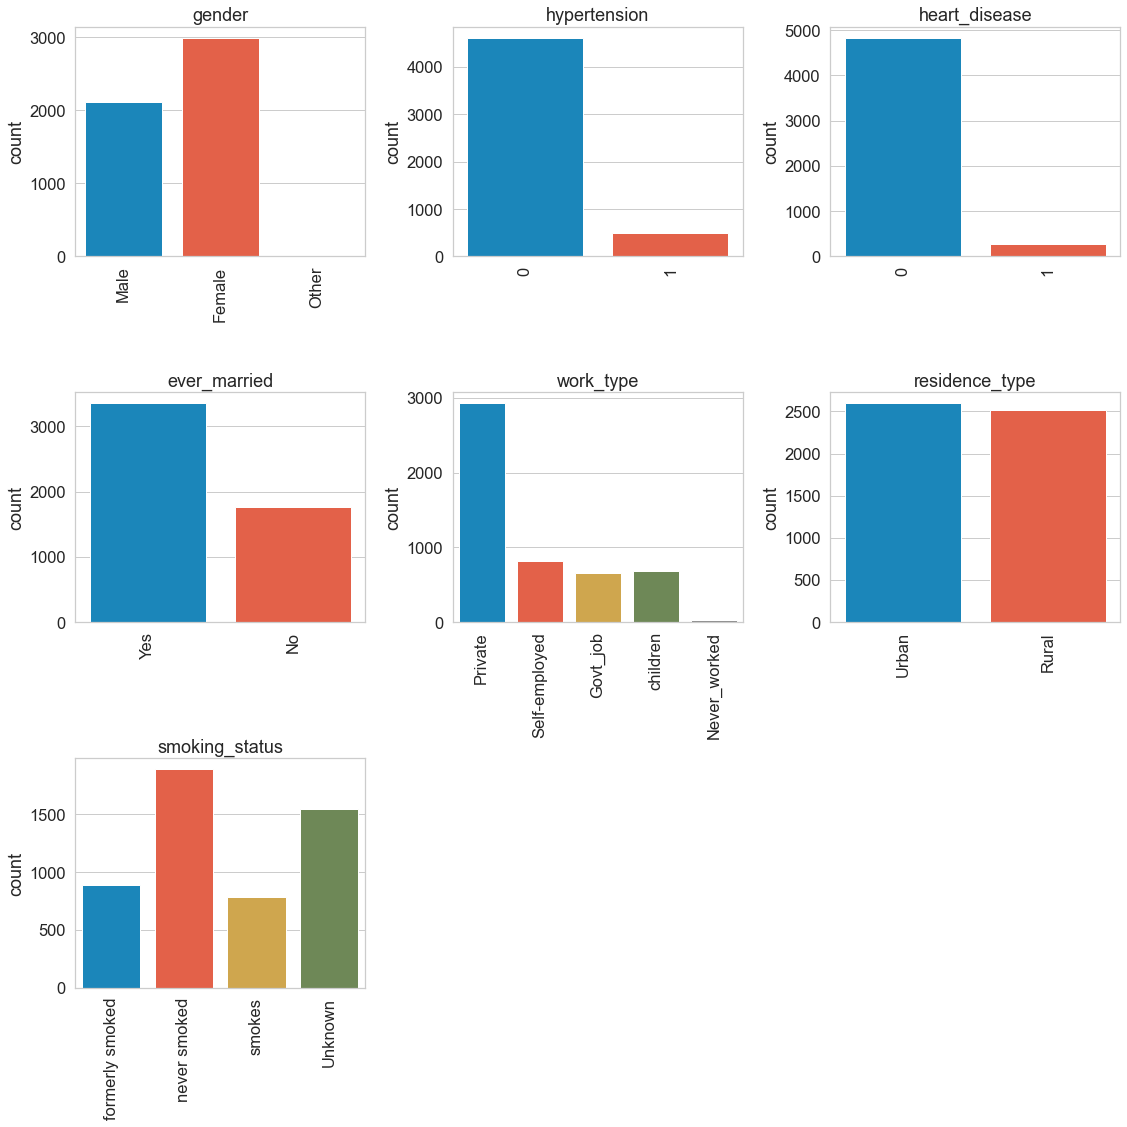

In [20]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(16,16))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The 'Other' category in 'gender' attribute appears only one time. I will replace it with the mode of the attribute.

В категории 'Other' показателя 'gender' всего один датапоинт, так что я заменю его на моду этого показателя.

In [22]:
gender_mode = data['gender'].mode().values[0]

data['gender'].replace('Other', gender_mode, inplace=True)
data['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

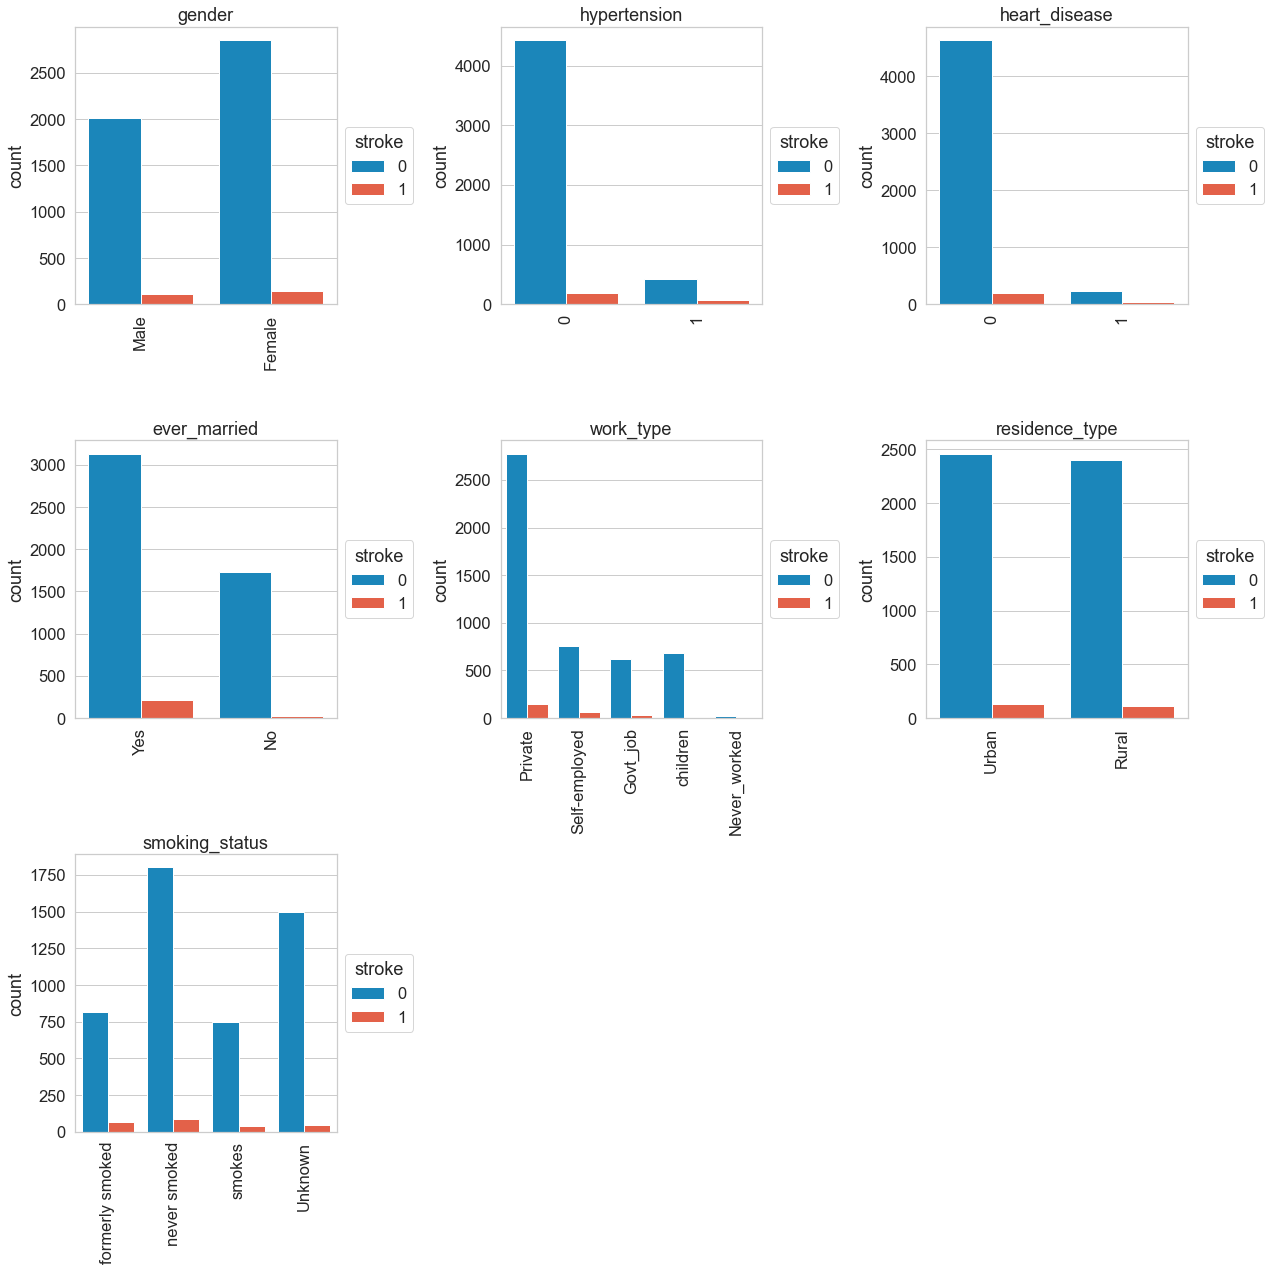

In [23]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

On the 'smoking_status' attribute, there's an 'Unknown' category. this equivalent to a null value. I have to change it since it will lead the machine learning to be misjudging: "People with unknown smoking status are more likely to be not a stroke". There are some approaches:

1. Data imputation based on the probability:

Calculate the probability for each category of having a stroke

Set the 'Unknown' to the category that has the highest probability of getting stroke or not getting stroke

2. Simply drop this attribute

3. Drop rows that has 'Unknown'

I will use the first one.

В показателе 'smoking_status' есть категория 'Unknown'. Это то же самое, что значение null. Эту категорию ответов надо будет заменить, так как она может повлиять на работу алгоритма машинного обучения. Для достижения этого есть несколько способов:

1. Подставить значения на основе их вероятности:
Посчитать вероятность приступа для каждой категории;
Заменить 'Unknown' на то значение, которое имеют наиболее высокую или низкую вероятность приступа.

2. Удалить показатель 'smoking_status'.

3. Удалить строки, содержащие 'Unknown'.

Я использую первый способ.

In [24]:
def stacked_bar_plot(data, x, y):
  fig, ax = plt.subplots(figsize=(8,6))

  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')

  plt.show()

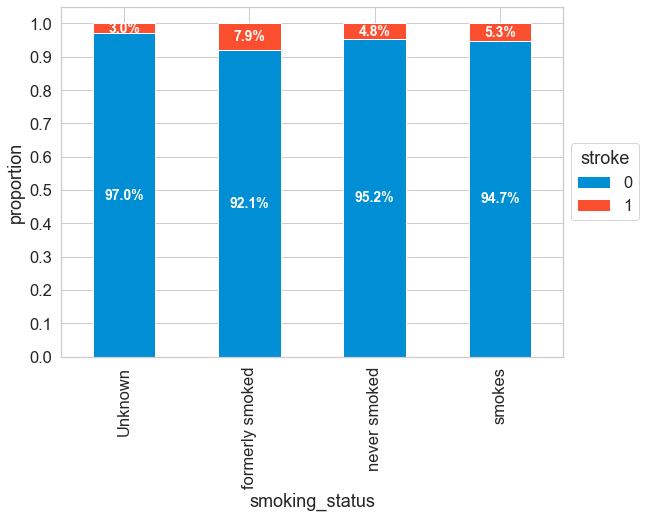

In [25]:
stacked_bar_plot(data, 'smoking_status', 'stroke')

On this plot, we can see that:

Patient who is never smoked has the highest probability of not getting a stroke
Patient who is formerly smoked has the highest probability of getting a stroke
Based on these insights, I will do data imputation for the 'Unknown' category:

1. Set it to never smoked for a patient who is not getting a stroke;
2. Set it to formerly smoked for a patient who is getting a stroke.

На графике видно:
Пациенты, которые никогда не курили имеют самую высокую вероятность не получить приступ
Пациенты, которые иногда курили имеют самую высокую вероятность приступа

На основе этого я сделаю следующие замены:

1. 'Never smoked' пациентам с 'Unknown' и '0';
2. 'Formerly smoked' пациента с 'Unknown' и '1'.

In [26]:
data[(data['stroke'] == 1) & (data['smoking_status'] == 'Unknown')].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,28.1,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,28.1,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1


In [27]:
mask = (data['stroke'] == 1) & (data['smoking_status'] == 'Unknown')

data.loc[mask, 'smoking_status'] = 'formerly smoked'
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,formerly smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,formerly smoked,1


In [28]:
mask = (data['stroke'] == 0) & (data['smoking_status'] == 'Unknown')

data.loc[mask, 'smoking_status'] = 'never smoked'
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,formerly smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,formerly smoked,1


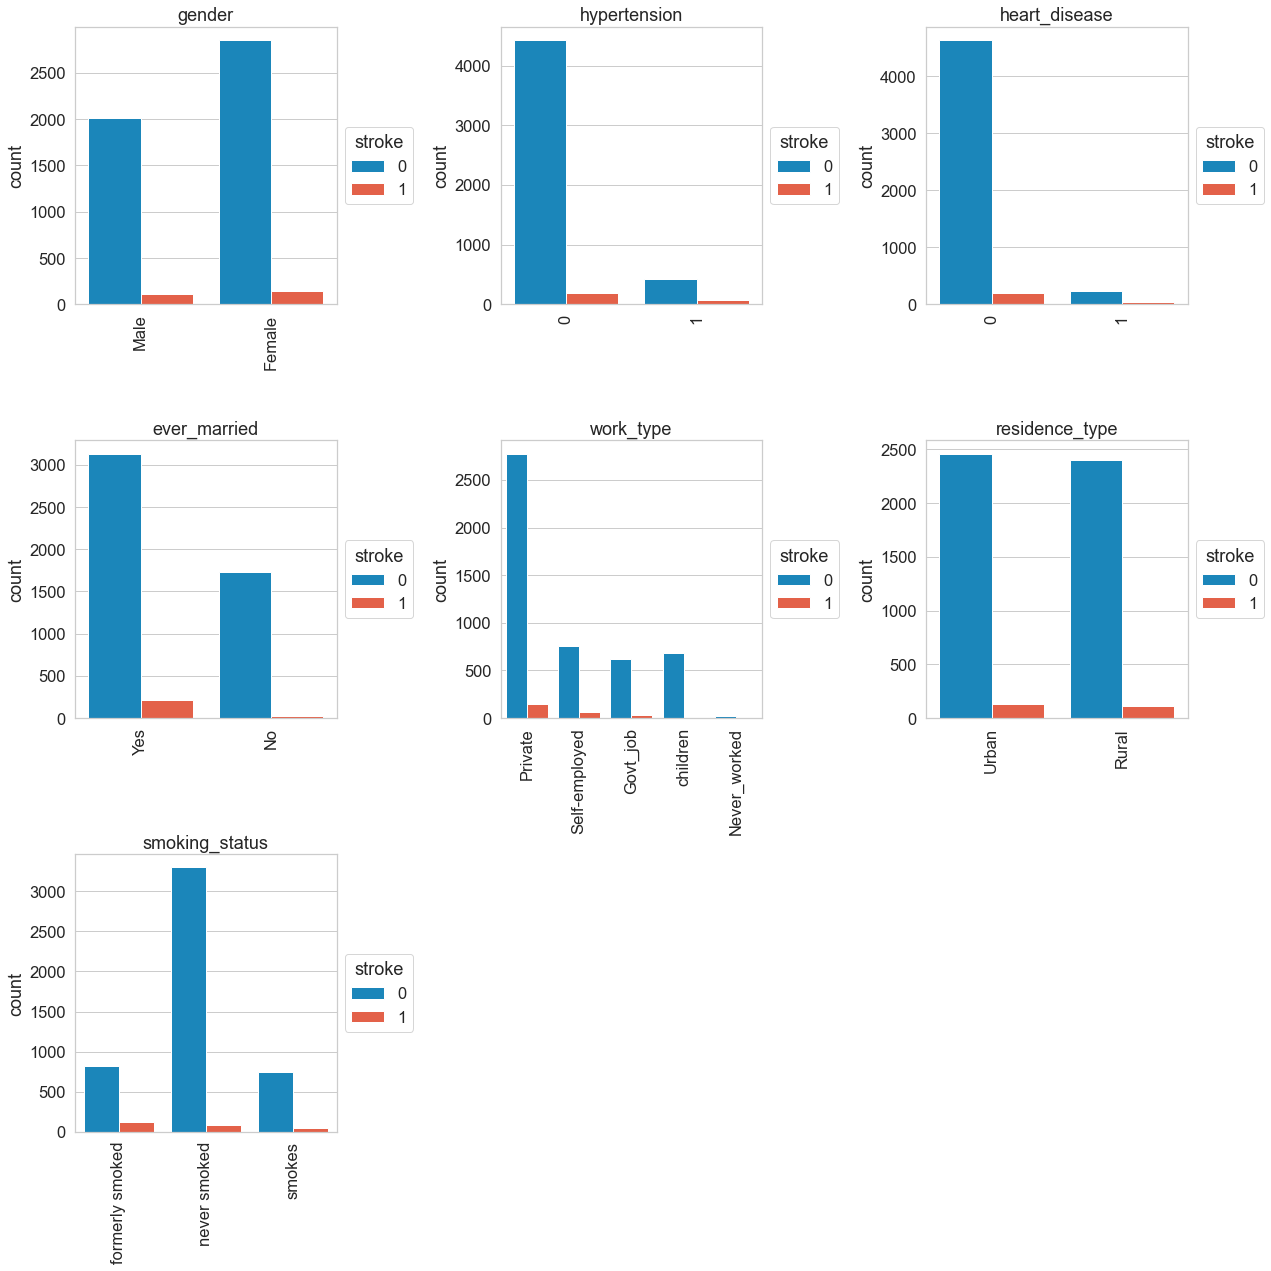

In [29]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

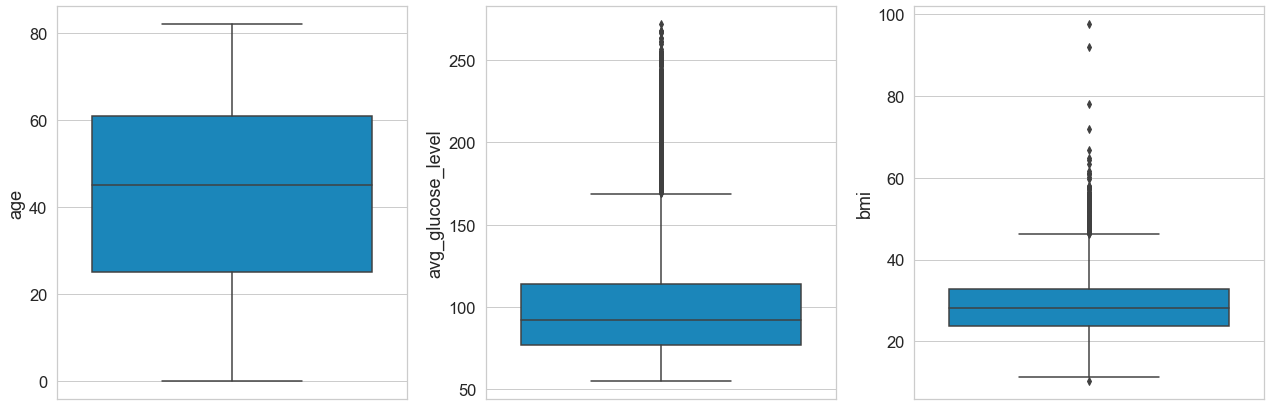

In [30]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, y=col, ax=ax[i])

plt.tight_layout()
plt.show()

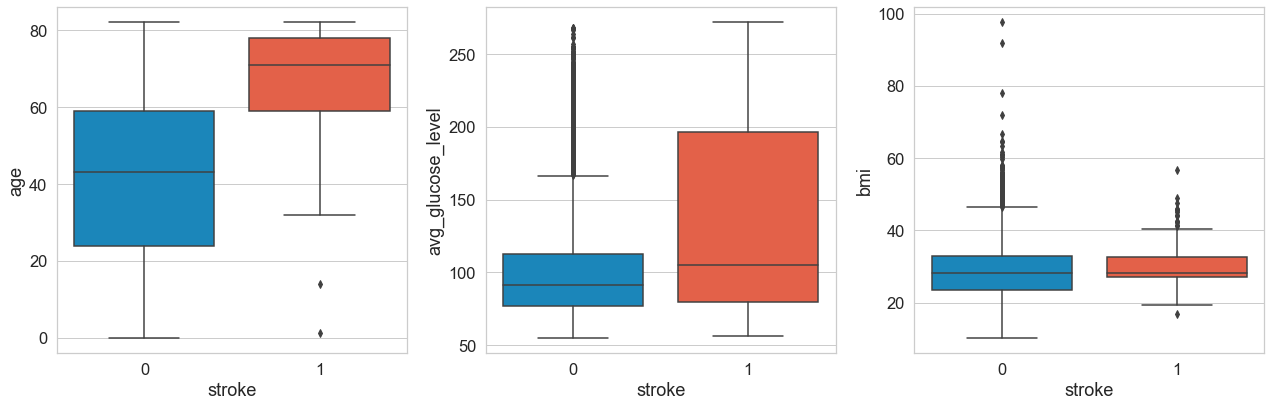

In [31]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
    sns.boxplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

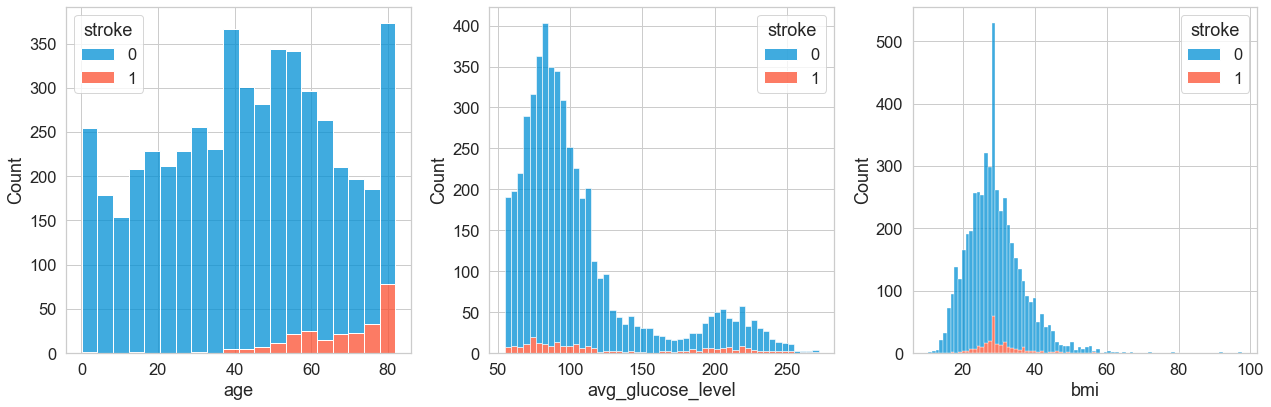

In [32]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
    sns.histplot(data=data, x=col, hue='stroke', multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()

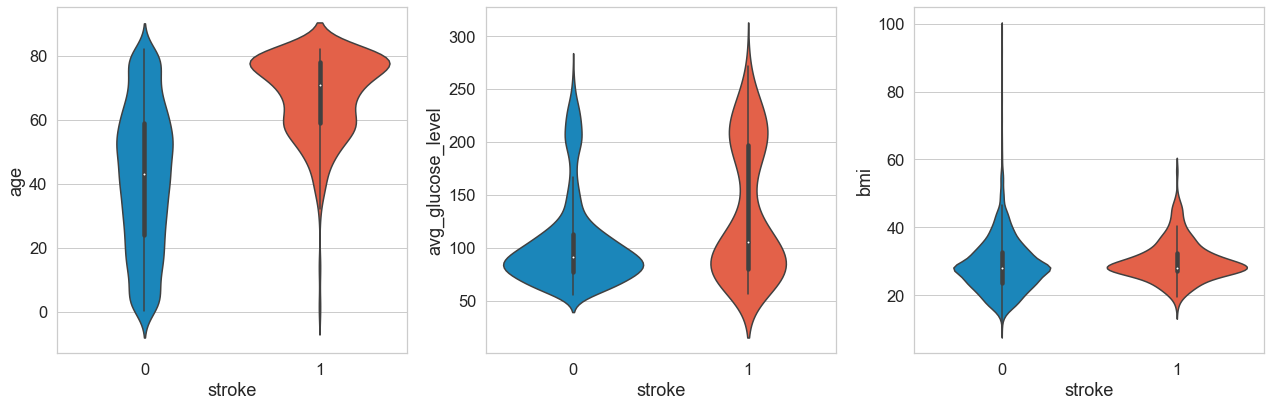

In [33]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
    sns.violinplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

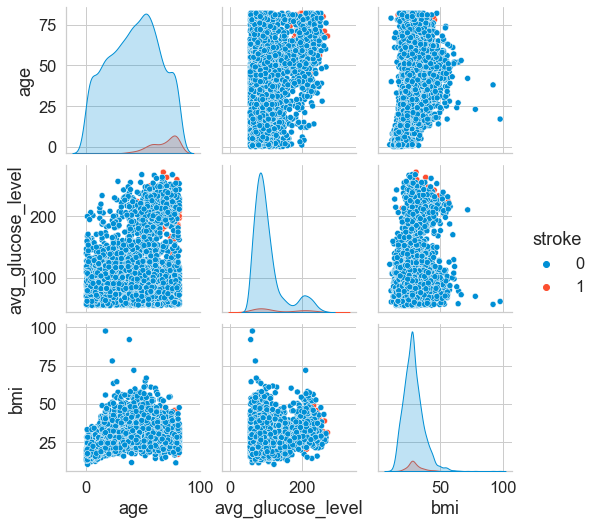

In [34]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

sns.pairplot(data, x_vars=column_numerical, y_vars=column_numerical, hue='stroke')

In [35]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

corr_matrix = data[column_numerical].corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,age,avg_glucose_level,bmi
age,1.000000,0.238000,0.324000
avg_glucose_level,0.238000,1.000000,0.167000
bmi,0.324000,0.167000,1.000000


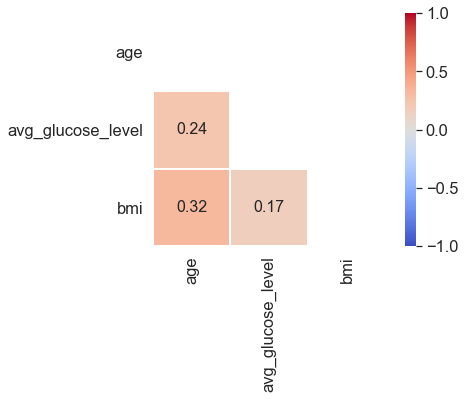

In [36]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16})

plt.show()

### Train-test split

In [37]:
data_X = data.drop('stroke', axis=1)
data_y = data['stroke']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

I use 'stratify' parameter to make sure the proportion of the target variable on the train and test subsets is balanced.

Я использую параметер 'stratify', чтобы соотношение целевых величин было одинаковое в тренировочном и тестовом датасетах.

In [39]:
y_train.value_counts()

0    3403
1     174
Name: stroke, dtype: int64

In [40]:
(round(174/3403,3), 174+3403)

(0.051, 3577)

In [41]:
y_test.value_counts()

0    1458
1      75
Name: stroke, dtype: int64

In [42]:
(round(75/1458,3), 75+1458)

(0.051, 1533)

This dataset is a mixture of numeric and categorical data and is not normally distributed, so next I'm going to perform label encoding and feature transformation. I will also remove some features that showed collinearity.

В этом датасете присутствуют разные типы данных, которые к тому же не нормально распределены, так что следующий шаг - это закодировать данные и провести трансформацию параметров. Я также удалю парамерты, которые сильно коррелируются между собой.

In [43]:
# ==============================
# label encoding
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

# ==============================
# one hot encoding
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']
                      
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

column_ohe = ohe.get_feature_names_out(column_categorical)

# encoding the X train
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)
X_train = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)

# encoding the X test
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)
X_test = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)

# ==============================
# feature scaling
column_numerical = ['age', 'avg_glucose_level', 'bmi']

for i in column_numerical:
    scaler = MinMaxScaler()
    scaler.fit(X_train[[i]])
    
    X_train[[i]] = scaler.transform(X_train[[i]])
    X_test[[i]] = scaler.transform(X_test[[i]])

# ==============================
# scaled dataframe
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)
data_scale = data_scale.join(pd.Series(y_train, name='stroke', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')
data_scale = data_scale.join(pd.Series(y_test, name='stroke', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

data_scale['stroke_1'].fillna(data_scale['stroke_2'], inplace=True)
data_scale.drop(columns='stroke_2', inplace=True)
data_scale.rename(columns={'stroke_1':'stroke'}, inplace=True)

# renaming the column
data_scale_col = list(data_scale.columns)

for i, col in enumerate(data_scale_col):
    data_scale_col[i] = inflection.underscore(data_scale_col[i])

data_scale.columns = data_scale_col

### Heatmap Correlation

### Корреляция

In [44]:
corr_matrix = data_scale.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,age,avg_glucose_level,bmi,gender_male,hypertension_1,heart_disease_1,ever_married_yes,work_type_never_worked,work_type_private,work_type_self_employed,work_type_children,residence_type_urban,smoking_status_never smoked,smoking_status_smokes,stroke
age,1.000000,0.238000,0.324000,-0.028000,0.276000,0.264000,0.679000,-0.079000,0.117000,0.328000,-0.634000,0.014000,-0.265000,0.073000,0.245000
avg_glucose_level,0.238000,1.000000,0.167000,0.055000,0.174000,0.162000,0.155000,-0.015000,0.017000,0.063000,-0.102000,-0.005000,-0.076000,0.018000,0.132000
bmi,0.324000,0.167000,1.000000,-0.026000,0.158000,0.037000,0.335000,-0.028000,0.204000,0.070000,-0.442000,-0.000000,-0.147000,0.084000,0.036000
gender_male,-0.028000,0.055000,-0.026000,1.000000,0.021000,0.086000,-0.030000,0.011000,-0.033000,-0.026000,0.089000,-0.006000,-0.045000,0.011000,0.009000
hypertension_1,0.276000,0.174000,0.158000,0.021000,1.000000,0.108000,0.164000,-0.022000,-0.005000,0.115000,-0.130000,-0.008000,-0.070000,0.031000,0.128000
heart_disease_1,0.264000,0.162000,0.037000,0.086000,0.108000,1.000000,0.115000,-0.016000,0.000000,0.087000,-0.092000,0.003000,-0.097000,0.044000,0.135000
ever_married_yes,0.679000,0.155000,0.335000,-0.030000,0.164000,0.115000,1.000000,-0.091000,0.154000,0.193000,-0.544000,0.006000,-0.225000,0.105000,0.108000
work_type_never_worked,-0.079000,-0.015000,-0.028000,0.011000,-0.022000,-0.016000,-0.091000,1.000000,-0.076000,-0.029000,-0.026000,0.023000,0.047000,-0.028000,-0.015000
work_type_private,0.117000,0.017000,0.204000,-0.033000,-0.005000,0.000000,0.154000,-0.076000,1.000000,-0.505000,-0.456000,-0.018000,-0.099000,0.100000,0.012000
work_type_self_employed,0.328000,0.063000,0.070000,-0.026000,0.115000,0.087000,0.193000,-0.029000,-0.505000,1.000000,-0.172000,0.011000,-0.072000,-0.004000,0.062000


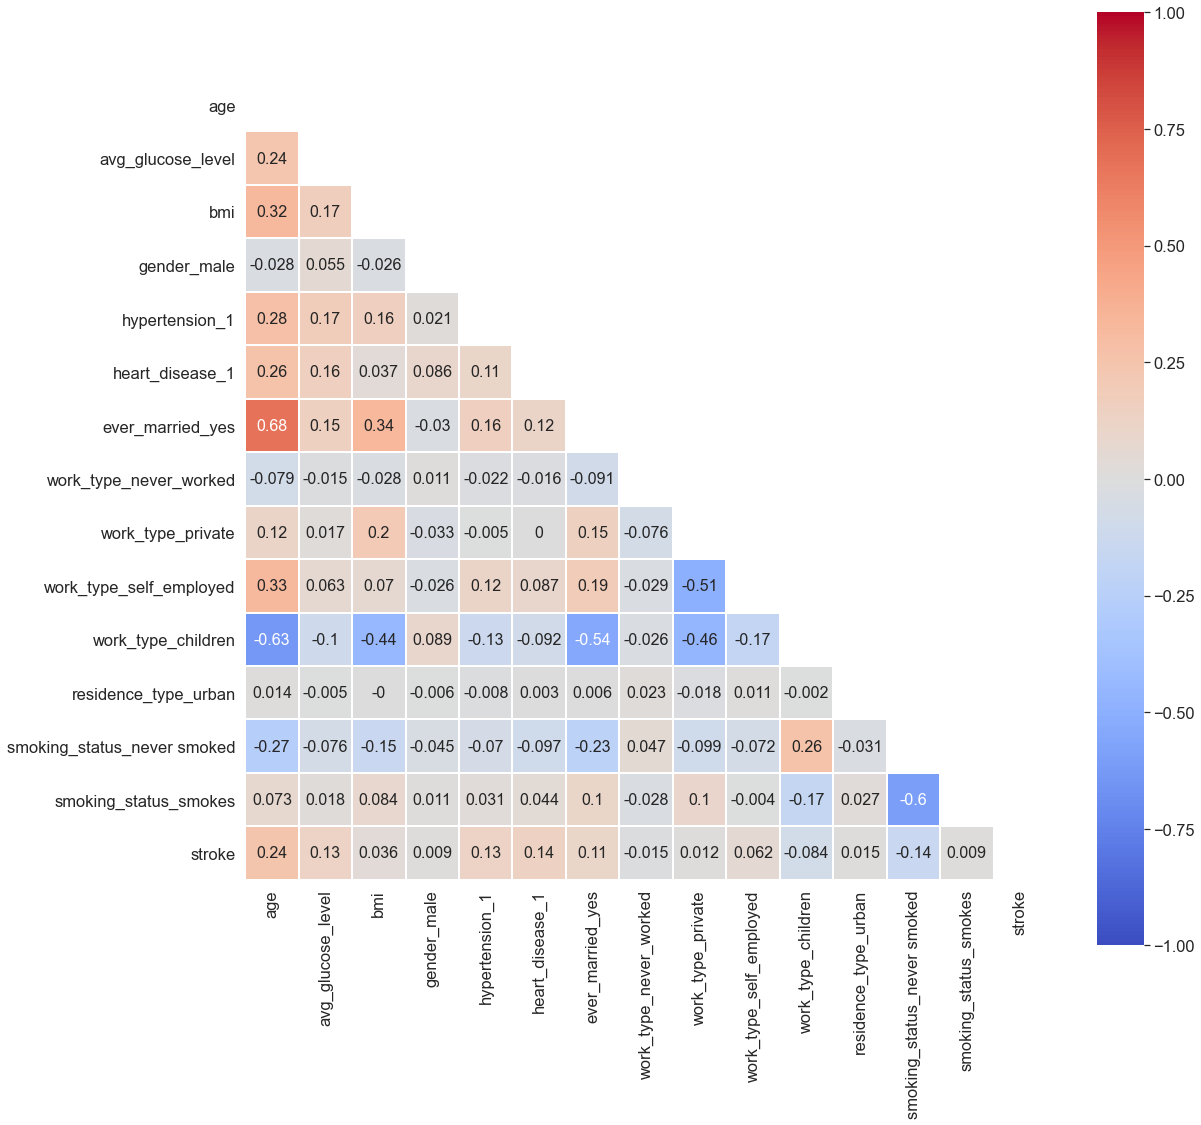

In [45]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

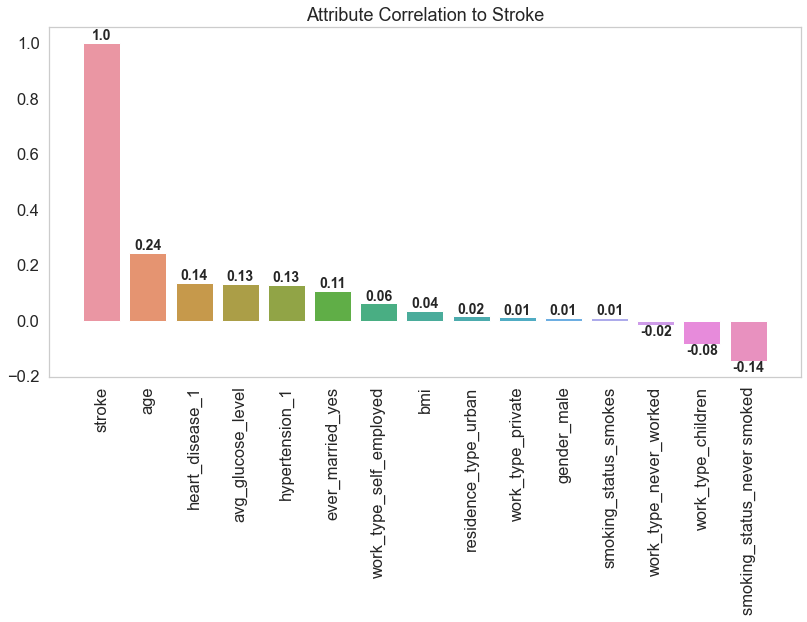

In [46]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['stroke'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation to Stroke')
plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
    if corr_target[n] >= 0:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
                horizontalalignment='center', verticalalignment='bottom',     
                fontsize=14, fontweight='bold')
    else:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
                horizontalalignment='center', verticalalignment='top',
                fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

### Model building

### Строим модель

I'm going to use logistic regression for this project. First, I'm going to try building logistic regression model with weights assigned to different target values.

Я использую модель логистической регрессии для этого проекта. Сперва я построю модель с дополнительными весами присвоенными значениям целевого показателя.

#### Weighted logistic regression

In [47]:
model_1 = LogisticRegression(solver='lbfgs')

In [48]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:0.5, 1:10}, {0:0.1, 1:10}, {0:0.01, 1:10}]
param_grid = dict(class_weight=balance)

In [49]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

In [50]:
grid = GridSearchCV(estimator=model_1, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')

In [51]:
grid_result = grid.fit(X_train, y_train)

In [52]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'class_weight': {0: 0.01, 1: 10}}


In [53]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.000000 (0.000000) with: {'class_weight': {0: 100, 1: 1}}
0.000000 (0.000000) with: {'class_weight': {0: 10, 1: 1}}
0.005882 (0.017647) with: {'class_weight': {0: 1, 1: 1}}
0.673529 (0.102465) with: {'class_weight': {0: 1, 1: 10}}
0.965686 (0.040736) with: {'class_weight': {0: 1, 1: 100}}
0.826362 (0.095500) with: {'class_weight': {0: 0.5, 1: 10}}
0.977124 (0.031886) with: {'class_weight': {0: 0.1, 1: 10}}
1.000000 (0.000000) with: {'class_weight': {0: 0.01, 1: 10}}


After running multiple checks, I decided to use class weights: 0:0.5, 1:10, because they give decent levels of both recall and accuracy. Other options trade either one or another metrics too much.

После проверки, дальше я буду использовать class weights: 0:0.5, 1:10, так как показатели recall и accuracy лучшие при данных параметрах. Другие варианты имеют слишком большой трейд-офф между показателями.

In [57]:
weights = {0:0.5, 1:10}
model_1 = LogisticRegression(solver='lbfgs', class_weight=weights)

In [58]:
accu_scores = cross_val_score(model_1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
ra_scores = cross_val_score(model_1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(model_1, X_train, y_train, scoring='recall', cv=cv)
precision_scores = cross_val_score(model_1, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

In [59]:
print('Mean ROC AUC: %.3f' % np.mean(ra_scores))
print('Mean accuracy: %.3f' % np.mean(accu_scores))
print('Mean recall: %.3f' % np.mean(recall_scores))
print('Mean precision: %.3f' % np.mean(precision_scores))

Mean ROC AUC: 0.863
Mean accuracy: 0.756
Mean recall: 0.818
Mean precision: 0.147


In [60]:
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [62]:
print('ROC AUC: %.3f' % roc_auc_score(y_test, y_pred_1))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_1))
print('Recall: %.3f' % recall_score(y_test, y_pred_1))
print('Precision: %.3f' % precision_score(y_test, y_pred_1))

ROC AUC: 0.775
Accuracy: 0.752
Recall: 0.800
Precision: 0.141


In [63]:
cm = confusion_matrix(y_test, y_pred_1)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Stroke', 1:'Stroke'}, index={0:'Not Stroke', 1:'Stroke'}, inplace=True)
df_cm

,Not Stroke,Stroke
Not Stroke,1093,365
Stroke,15,60


It is hard for model to work properly on inbalanced dataset, even in the presence of class weights. If we prefer to maximize recall, then it would assign 'positive' to all entries, thus, making accuracy and precision drop. If we decide to maximize other metrics, recall drops, because model starts to assign each entry a 'negative'.

To fix this, I'm going to use SMOTE to upsample the dataset.

Тяжело получить достаточно высокие показатели по всем метрикам качества модели на основе сильно несбалансированного датасета. Если мы хотим максимизировать recall, модель назначает '1' всем датапоинтам, и таким образом сильно понижает показатели accuracy и precision. Если же пытаться максимизировать другие метрики, то сильно снижается recall.

Чтобы исправить это, я использую SMOTE для того, чтобы уравновесить датасет.

#### SMOTE

In [64]:
smote = SMOTE()

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [65]:
pd.Series(y_train).value_counts()

0    3403
1     174
dtype: int64

In [66]:
pd.Series(y_train_res).value_counts()

0    3403
1    3403
dtype: int64

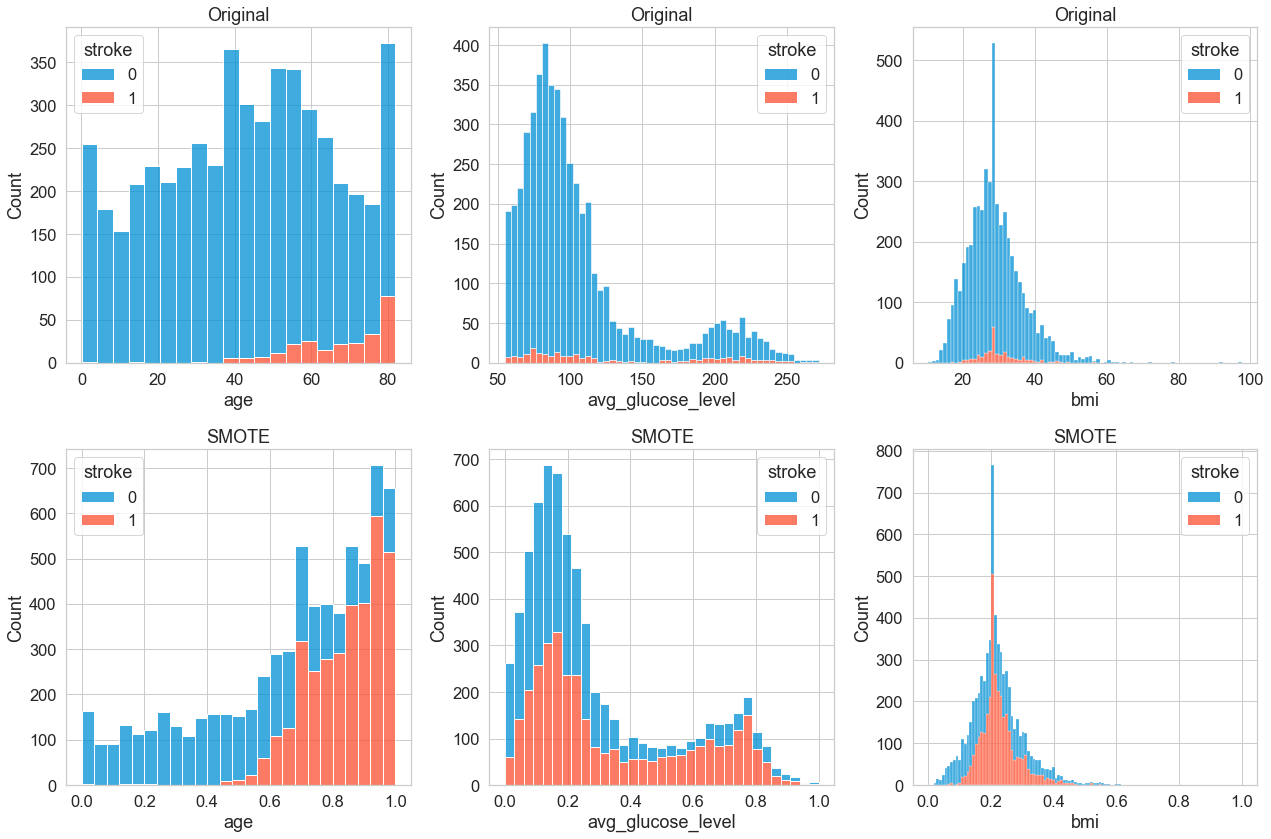

In [67]:
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

data_resampled = pd.concat([X_train_res_df, y_train_res_df], axis=1)

column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
    sns.histplot(data=data, x=col, hue='stroke', multiple='stack', ax=axes_list[i])
    axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
    sns.histplot(data=data_resampled, x=col, hue='stroke', multiple='stack', ax=axes_list[i+3])
    axes_list[i+3].set_title('SMOTE')

plt.tight_layout()
plt.show()

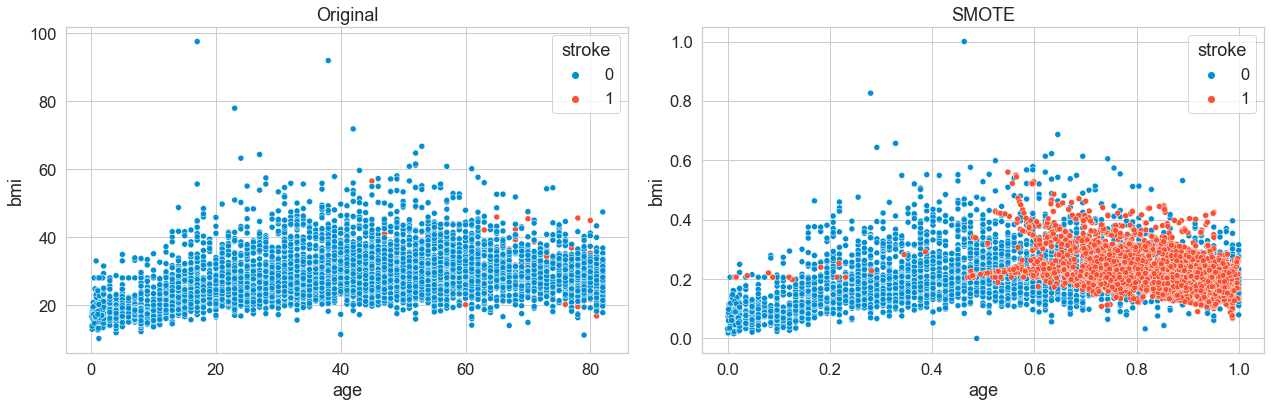

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', ax=ax[0])
ax[0].set_title('Original')

sns.scatterplot(data=data_resampled, x='age', y='bmi', hue='stroke', ax=ax[1])
ax[1].set_title('SMOTE')

plt.tight_layout()
plt.show()

In [69]:
model_2 = LogisticRegression(solver='lbfgs')

In [70]:
cv_2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

In [71]:
accu_scores_2 = cross_val_score(model_2, X_train_res, y_train_res, scoring='accuracy', cv=cv_2, n_jobs=-1)
ra_scores_2 = cross_val_score(model_2, X_train_res, y_train_res, scoring='roc_auc', cv=cv_2, n_jobs=-1)
recall_scores_2 = cross_val_score(model_2, X_train_res, y_train_res, scoring='recall', cv=cv_2, n_jobs=-1)
precision_scores_2 = cross_val_score(model_2, X_train_res, y_train_res, scoring='precision', cv=cv_2, n_jobs=-1)

In [72]:
print('Mean ROC AUC: %.3f' % np.mean(ra_scores_2))
print('Mean accuracy: %.3f' % np.mean(accu_scores_2))
print('Mean recall: %.3f' % np.mean(recall_scores_2))
print('Mean precision: %.3f' % np.mean(precision_scores_2))

Mean ROC AUC: 0.882
Mean accuracy: 0.814
Mean recall: 0.863
Mean precision: 0.787


In [73]:
model_2.fit(X_train_res, y_train_res)
y_pred_2 = model_2.predict(X_test)

In [74]:
print('ROC AUC: %.3f' % roc_auc_score(y_test, y_pred_2))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_2))
print('Recall: %.3f' % recall_score(y_test, y_pred_2))
print('Precision: %.3f' % precision_score(y_test, y_pred_2))

ROC AUC: 0.766
Accuracy: 0.759
Recall: 0.773
Precision: 0.141


In [74]:
cm = confusion_matrix(y_test, y_pred_2)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Stroke', 1:'Stroke'}, index={0:'Not Stroke', 1:'Stroke'}, inplace=True)
df_cm

,Not Stroke,Stroke
Not Stroke,1101,357
Stroke,17,58


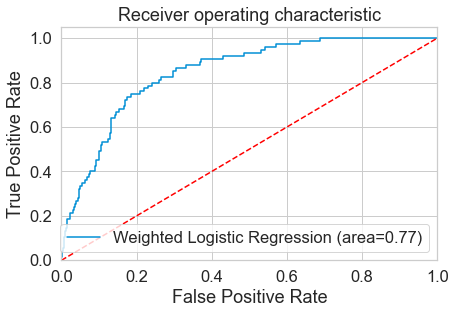

In [75]:
logit_roc_auc = roc_auc_score(y_test, model_1.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, model_1.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr, label='Weighted Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

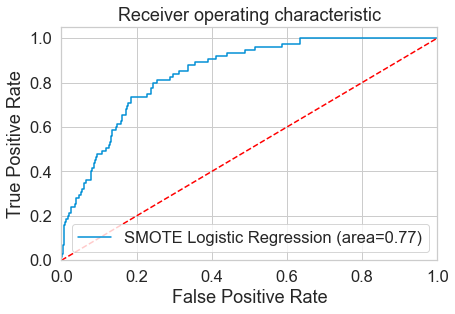

In [76]:
logit_roc_auc = roc_auc_score(y_test, model_2.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, model_2.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr, label='SMOTE Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC curve shows if our model does better than random classifier (red line), which it does.

График ROC показывает, лучше ли наша модель справляется, чем рандомизированная модель. Поскольку синия линия на графике выше красной, можно заключить, что наша модель лучше.

However, I was not able to determine which model is better to use. Quality metrics give close results for both models. As further research, I would suggest trying over classification models.

В итоге, я не смогла определить какая из моделей показывает себя лучше. Метрики качества моделей дают примерно одинаковые результаты на обеих моделях. В будущем, я бы хотела попробовать другие классификаторы на этом датасете.

Another thing I'm interested in is odds ratios for different attributes. I'm going to use SMOTE dataset for this.

Я бы также хотела узнать odds ratio некоторых параметров модели. Для этого я буду использовать сбалансированный SMOTE датасет.

In [77]:
X_train_res['stroke'] = y_train_res

In [79]:
data_exog = X_train_res.drop('stroke', axis=1)
data_endog = X_train_res['stroke']

In [80]:
data_exog = sm.add_constant(data_exog, prepend=False)

In [81]:
glm_binom = sm.GLM(data_endog, data_exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 6806
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.1
Date:                Sat, 19 Mar 2022   Deviance:                       5590.2
Time:                        20:59:59   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
age               

According to summary table, one unit increase in 'bmi' increases odds of getting a stroke by a factor of 3.77 or by 276.78%.

For one unit increase in 'avg_glucose_level' odds of getting a stroke increases by a factor of 2.27 or by 127.28%.

For one unit increase in 'age' odds of getting a stroke increases by a factor of 3580 or by 357929.33%.

Thus, I can conclude with increasing age people get the most risk of getting a stroke.

Men's odds of getting a stroke in comparison to women are smaller by a factor of 0.79 or by 21.25%.

People with hypertension have higher odds of having a stroke by the factor of 1.50 or by 20.23%.

People who work in private sector have higher odds of having a stroke than those working in goverment (control) by a factor of 1.39 or by 39.33%.

People who work with children have higher odds of having a stroke than those working in goverment (contro) by a factor of 10.64 or by 963.76%.

Interestingly enough, both people who smoke regularly and those who do not smoke at all have lower odds of getting a stroke than those who smoke formerly.

Согласно сводной таблице, увеличение 'bmi' на одну единицу увеличивает вероятность приступа в 3,77 раза или на 276,78%.

При увеличении 'avg_glucose_level' на одну единицу шансы получить приступ увеличиваются в 2,27 раза или на 127,28%.

На единицу увеличения «возраста» шансы получить приступ увеличиваются в 3580 раз, или на 357929,33%.

Вероятность приступа у мужчин по сравнению с женщинами меньше в 0,79 раза, или на 21,25%.

У людей с гипертонией вероятность приступа выше в 1,50 раза или на 20,23%.

У людей, работающих в частном секторе, вероятность приступа выше, чем у работающих в государственном (контрольном) секторе в 1,39 раза, или на 39,33%.

У людей, работающих с детьми, вероятность приступа выше, чем у работающих в правительстве (контроль) в 10,64 раза или на 963,76%.

Интересно, что как у людей, которые курят регулярно, так и у тех, кто вообще не курит, шансы получить приступ ниже, чем у тех, кто курил раньше. 